In [3]:
import cv2
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

In [4]:
flag =0
import glob
path = "/rebars/*.*"
for file in glob.glob(path):
   print(file)
   a= cv2.imread(file)
   cv2_imshow(a)
   if(a.shape !=(256,256,3)):
    flag =1
   print(a.shape)

In [5]:
cd..
ls

SyntaxError: invalid syntax (<ipython-input-5-0c52fc8eb9a6>, line 1)

In [6]:
cd rebars

/home/tsaileshkumar/ML_Project/rebars


In [7]:
# import the modules
import os
from os import listdir

count =0
 
# get the path/directory
folder_dir = "/home/tsaileshkumar/ML_Project/rebars"
for images_rebars in os.listdir(folder_dir):
    print(images_rebars)
    count+=1
    
 
    # check if the image ends with png
#     if (images.endswith(".png")):
#         print(images)
#         count+=1

21.png
34.png
79.png
44.png
45.png
42.png
73.png
124.png
116.png
63.png
46.png
38.png
30.png
22.png
2.png
72.png
80.png
104.png
39.png
81.png
43.png
114.png
55.png
111.png
15.png
108.png
18.png
68.png
6.png
91.png
78.png
35.png
41.png
82.png
saved_model
49.png
112.png
84.png
32.png
92.png
65.png
105.png
67.png
48.png
101.png
71.png
33.png
25.png
110.png
77.png
36.png
50.png
37.png
74.png
31.png
19.png
56.png
53.png
100.png
8.png
57.png
122.png
51.png
64.png
17.png
58.png
60.png
12.png
115.png
54.png
62.png
61.png
59.png
102.png
27.png
23.png
3.png
119.png
66.png
5.png
4.png
16.png
121.png
47.png
103.png
28.png
85.png
52.png
24.png
29.png
83.png
26.png
14.png
117.png
11.png
20.png
7.png
93.png
70.png


In [8]:
count # number of rebar images

99

In [9]:
# import the modules
# import os
# from os import listdir

# count =0
 
# # get the path/directory
# folder_dir = "/home/tsaileshkumar/ML_Project/cementitiousDebris"
# for images_cement in os.listdir(folder_dir):
#     print(images_cement)
#     count+=1
import pathlib
archive ='/home/tsaileshkumar/ML_Project/dataset_1'
# data_dir = pathlib.Path(archive).with_suffix('')
data_dir = pathlib.Path(archive)
    
rebars = list(data_dir.glob('cement/*'))
for i in range(len(rebars)):
    im = PIL.Image.open(str(rebars[0]))
    w,h = im.size
#     if (w!=256 or h!= 256):
    print(w,h)

256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256
256 256


In [10]:
count

99

In [11]:
# there is a huge difference in number of images.
# that can cause problems in training. We should see what to do
# https://towardsdatascience.com/image-data-augmentation-for-deep-learning-77a87fabd2bf
# https://github.com/tensorflow/models

In [12]:
print(tf.__version__)

2.6.0


In [13]:
train_directory = '/home/tsaileshkumar/ML_Project/dataset/train'
test_directory = '/home/tsaileshkumar/ML_Project/dataset/test'

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(
train_directory, 
target_size=(150,150), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)
validation_generator = train_datagen.flow_from_directory(
train_directory,
target_size=(150,150), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical', 
subset='validation', 
shuffle=False
)

Found 213 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [16]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_directory,
target_size=(150,150), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical', 
shuffle=False
)
print(type(test_generator))

Found 67 images belonging to 2 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>


In [17]:
# from tensorflow.keras import Model
# model = models.Sequential()
# model.add(Conv2D(256, kernel_size=(3,3), activation='relu',input_shape=(256,256,3)))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(l2=0.001)))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(16, kernel_regularizer=l2(l2=0.001)))
# model.add(Dense(3, activation='softmax'))
            
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# model.fit(train_generator,
#           steps_per_epoch=40,
#           epochs=50,
#           validation_data=(validation_generator),
#           validation_steps=10)

In [18]:
# transfer learning
# from tensorflow import keras 

# input_layer = keras.layers.Input(shape=(256, 256, 3))
# irv2 = keras.applications.Xception(weights='imagenet',include_top=False,input_tensor = input_layer)
# global_avg = keras.layers.GlobalAveragePooling2D()(irv2.output)
# dense_1 = keras.layers.Dense(1,activation = 'sigmoid')(global_avg)
# model = keras.Model(inputs=irv2.inputs,outputs=dense_1)
# model.summary()

In [19]:
import pathlib
archive ='/home/tsaileshkumar/ML_Project/dataset_1'
# data_dir = pathlib.Path(archive).with_suffix('')
data_dir = pathlib.Path(archive)

In [20]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

332


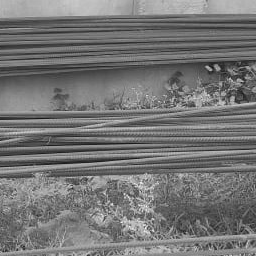

In [21]:
rebars = list(data_dir.glob('rebars/*'))
PIL.Image.open(str(rebars[0]))

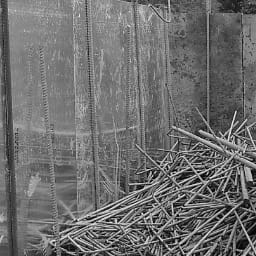

In [21]:
PIL.Image.open(str(rebars[1]))

In [23]:
batch_size = 32
img_height = 180
img_width = 180

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 332 files belonging to 2 classes.
Using 266 files for training.


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 332 files belonging to 2 classes.
Using 66 files for validation.


In [26]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2*val_batches) // 3)
val_ds = val_ds.skip((2*val_batches) // 3)



In [27]:
class_names = train_ds.class_names
print(class_names)

['Debris', 'rebars']


channels 3
channels 3
channels 3
channels 3
channels 3
channels 3
channels 3
channels 3
channels 3


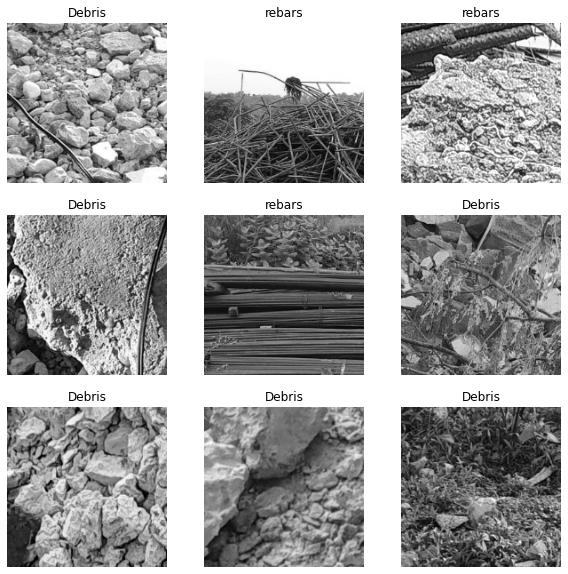

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    height, width, channels = images[i].numpy().astype("uint8").shape
    print('channels', channels)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [30]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [31]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.11464052 0.9826362


In [209]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [210]:
num_classes = 2

model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [211]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [212]:
# Save the model
model_json = model.to_json()
with open("/home/tsaileshkumar/ML_Project/weights/model.json", "w") as json_file:
    json_file.write(model_json)

In [213]:
# Save the weights using a checkpoint.
filepath="/home/tsaileshkumar/ML_Project/weights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [214]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
9/9 [==============================] - 5s 474ms/step - loss: 0.9119 - accuracy: 0.5338 - val_loss: 0.7428 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 12s 1s/step - loss: 0.6407 - accuracy: 0.6917 - val_loss: 0.6669 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 4s 404ms/step - loss: 0.5906 - accuracy: 0.6955 - val_loss: 0.6742 - val_accuracy: 0.5000
Epoch 4/10
9/9 [==============================] - 4s 403ms/step - loss: 0.5429 - accuracy: 0.7105 - val_loss: 0.6346 - val_accuracy: 0.5000
Epoch 5/10
9/9 [==============================] - 4s 405ms/step - loss: 0.5401 - accuracy: 0.7481 - val_loss: 0.6074 - val_accuracy: 0.5000
Epoch 6/10
9/9 [==============================] - 4s 403ms/step - loss: 0.4283 - accuracy: 0.8158 - val_loss: 0.6341 - val_accuracy: 0.5000
Epoch 7/10
9/9 [==============================] - 4s 423ms/step - loss: 0.3750 - accuracy: 0.8308 - val_loss: 1.0289 - val_accuracy: 0.5000
Epoch 8/10
9/9 [======

In [215]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# # utility function for showing images
# def show_imgs(x_test, decoded_imgs=None, n=10):
#     plt.figure(figsize=(20, 4))
#     for i in range(n):
#         ax = plt.subplot(2, n, i+1)
#         plt.imshow(x_test[i].reshape(28,28))
#         plt.gray()
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

#         if decoded_imgs is not None:
#             ax = plt.subplot(2, n, i+ 1 +n)
#             plt.imshow(decoded_imgs[i].reshape(28,28))
#             plt.gray()
#             ax.get_xaxis().set_visible(False)
#             ax.get_yaxis().set_visible(False)
#     plt.show()

In [219]:
# test_ds = test_ds.astype('float32') / 255
# print('Predict the classes: ')
# prediction = model.predict(test_ds) 
# classes_x=np.argmax(prediction,axis=1)
# # prediction = model.predict_classes(x_test_reshaped[10:20])
# show_imgs(test_ds)
# print('Predicted classes: ', classes)

In [221]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


In [222]:
model = load_model(filepath, compile = True)

In [224]:
i

TypeError: 'PrefetchDataset' object is not subscriptable

In [112]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [64]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False,)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2049

In [66]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
4/4 [==============================] - 18s 3s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 11s 3s/step - loss: 0.6932 - binary_ac